# **EDA Notebook**



---
## 0. Setup Environment

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT3",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT3/data


---
## Student Information

In [2]:
# <Student to fill this section>
group_name = "Group 12"
student_name = "Victor Rono"
student_id = "25669944"

In [3]:
# Do not modify this code
print_tile(size="h1", key='group_name', value=group_name)

In [4]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

### 0.b Import Packages

In [62]:
# <Student to fill this section>
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

---
## B. Data Understanding

In [7]:
# Do not modify this code
try:
  df = pd.read_csv(at.folder_path / "territories.csv")
except Exception as e:
  print(e)

### B.1 Explore Dataset

In [10]:
# work on a copy so as not to modify df
dfw = df.copy()

# structure and quality snapshot
print({"rows": len(dfw), "cols": dfw.shape[1], "duplicates": int(dfw.duplicated().sum())})
display(dfw.head(5))

miss = (dfw.isna().mean().sort_values(ascending=False)*100).round(1).reset_index()
miss.columns = ["column","missing_pct"]
print("Top-10 missingness (%):"); display(miss.head(10))

# territory totals faster view
geo_cols = [c for c in ["Continent","Country","Region"] if c in dfw.columns]
by_geo = (dfw.groupby(geo_cols, dropna=False).size()
            .sort_values(ascending=False).reset_index(name='count')) if geo_cols else None
if by_geo is not None:
    print("Top territories by count:"); display(by_geo.head(10))

{'rows': 10, 'cols': 5, 'duplicates': 0}


,Unnamed: 0,SalesTerritoryKey,Region,Country,Continent
0,0,1,Northwest,United States,North America
1,1,2,Northeast,United States,North America
2,2,3,Central,United States,North America
3,3,4,Southwest,United States,North America
4,4,5,Southeast,United States,North America


Top-10 missingness (%):


,column,missing_pct
0,Unnamed: 0,0.0
1,SalesTerritoryKey,0.0
2,Region,0.0
3,Country,0.0
4,Continent,0.0


Top territories by count:


,Continent,Country,Region,count
0,Europe,France,France,1
1,Europe,Germany,Germany,1
2,Europe,United Kingdom,United Kingdom,1
3,North America,Canada,Canada,1
4,North America,United States,Central,1
5,North America,United States,Northeast,1
6,North America,United States,Northwest,1
7,North America,United States,Southeast,1
8,North America,United States,Southwest,1
9,Pacific,Australia,Australia,1


In [11]:
def _pct(x):
    try: return f"{x:.1f}%"
    except: return str(x)

rows, cols_n = dfw.shape
dup = int(dfw.duplicated().sum())
miss_top = ", ".join([f"{r.column}={_pct(r.missing_pct)}" for _, r in miss.head(3).iterrows()]) if len(miss) else "low"

dataset_insights = f"""
**Dataset (pf) overview**
• Shape: {rows} rows × {cols_n} columns (duplicates: {dup}).
• Missingness (top): {miss_top}.
• Keys present: {'SalesTerritoryKey' if 'SalesTerritoryKey' in dfw.columns else '—'}, geography={geo_cols if geo_cols else '—'}, date={'return_date/ym' if ('return_date' in dfw.columns or 'ym' in dfw.columns) else '—'}.

**Exploration**
• Computed territory totals and an overall monthly trend.

**Quality notes**
• Dates/quantities coerced where available; investigate NA geographies and large spikes.
""".strip()

In [12]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.2 Explore Feature of Interest `\<put feature name here\>`

,count
Region,
Australia,1
Canada,1
Central,1
France,1
Germany,1
Northeast,1
Northwest,1
Southeast,1
Southwest,1


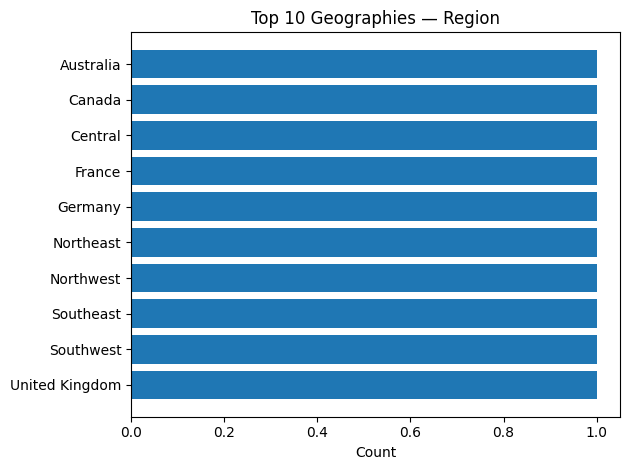

In [24]:
#Feature 1: Territory Totals
#create a copy
dfw = df.copy()

# select the most granular geography available
geo = "Region" if "Region" in dfw.columns else ("Country" if "Country" in dfw.columns else ("Continent" if "Continent" in dfw.columns else None))
assert geo is not None, "No geography column found (need Region/Country/Continent)."

# Since there is no 'return_quantity' column, we can explore the counts of each geography
if geo:
    counts = dfw.groupby(geo).size().sort_values(ascending=False)
    display(counts.head(15).to_frame(name="count"))

    top10 = counts.head(10)
    plt.figure()
    plt.barh(top10.index.astype(str)[::-1], top10.values[::-1])
    plt.title(f"Top 10 Geographies — {geo}")
    plt.xlabel("Count")
    plt.tight_layout(); plt.show()

In [22]:

# Use 'counts' instead of 'totals' as calculated in the previous cell
share_top3 = 100 * counts.head(3).sum() / max(counts.sum(), 1)

feature_1_insights = f"""
**Feature:** total returns by `{geo}`

**Findings**
• Distinct {geo}s: {counts.shape[0]}.
• Top-3 {geo}s account for ≈ {share_top3:.1f}% of all returns.

**Notes**
• Concentration risk: monitor shifts in the top contributors over time.
""".strip()

In [25]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### B.3 Explore Feature of Interest `\<put feature name here\>`

DATA_DIR is defined as: /content/gdrive/MyDrive/36106/assignment/AT3/data


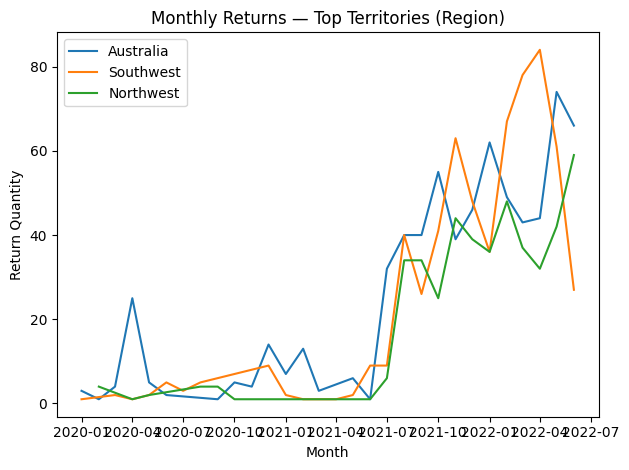

{'months': 30, 'geo': 'Region', 'top_territories': ['Australia', 'Southwest', 'Northwest']}


In [56]:
# Feature 2: monthly seasonality by territory
# Define DATA_DIR using the AtFolder object from the setup
DATA_DIR = at.folder_path
print(f"DATA_DIR is defined as: {DATA_DIR}")
# --- 1) Build dfw that DEFINITELY has `return_quantity` -----------------------
# If `df` already exists AND has return_quantity + a date, reuse it; otherwise load/merge files.
use_df_direct = ("df" in globals()
                 and isinstance(df, pd.DataFrame)
                 and "return_quantity" in df.columns
                 and (("ym" in df.columns) or ("return_date" in df.columns)))
if use_df_direct:
    dfw = df.copy()
else:
    # Load core files from Drive
    returns = pd.read_csv(DATA_DIR / "returns.csv").rename(columns=str.strip)
    territor = pd.read_csv(DATA_DIR / "territories.csv").rename(columns=str.strip)

    # Harmonise key names and types
    returns = returns.rename(columns={"territory_id": "SalesTerritoryKey"})
    returns["return_date"]     = pd.to_datetime(returns["return_date"], errors="coerce")
    returns["return_quantity"] = pd.to_numeric(returns["return_quantity"], errors="coerce").fillna(0)

    # Keep geography columns that actually exist
    keep_geo = [c for c in ["SalesTerritoryKey","Region","Country","Continent"] if c in territor.columns]
    if "SalesTerritoryKey" not in keep_geo:
        keep_geo = ["SalesTerritoryKey"]  # minimum needed to join
    territor = territor[keep_geo]

    # Merge so dfw HAS quantities + geography (this resolves the KeyError)
    dfw = returns.merge(territor, on="SalesTerritoryKey", how="left")

# --- 2) Month key + numeric target -------------------------------------------
if "ym" not in dfw.columns and "return_date" in dfw.columns:
    dfw["ym"] = pd.to_datetime(dfw["return_date"], errors="coerce").dt.to_period("M").dt.to_timestamp()

dfw["return_quantity"] = pd.to_numeric(dfw["return_quantity"], errors="coerce").fillna(0)

# --- 3) Choose an existing territory label (business-friendly order) ----------
geo = next((c for c in ["Region","Country","Continent","SalesTerritoryKey"] if c in dfw.columns), None)
if geo is None or "ym" not in dfw.columns:
    raise ValueError("Need a geography column (Region/Country/Continent/SalesTerritoryKey) "
                     "and a date/ym column to plot seasonality.")

# --- 4) Build territory×month panel; plot top-3 lines -------------------------
panel = (dfw.groupby([geo, "ym"])["return_quantity"]
           .sum()
           .reset_index()
           .rename(columns={"return_quantity": "monthly_returns"}))

# Top 3 territories by total returns across the horizon
top3 = (panel.groupby(geo)["monthly_returns"].sum()
            .sort_values(ascending=False)
            .head(3)
            .index.tolist())

plt.figure()
for g in top3:
    s = (panel.loc[panel[geo] == g, ["ym", "monthly_returns"]]
               .sort_values("ym"))
    plt.plot(s["ym"], s["monthly_returns"], label=str(g))
plt.title(f"Monthly Returns — Top Territories ({geo})")
plt.xlabel("Month"); plt.ylabel("Return Quantity")
plt.legend(); plt.tight_layout(); plt.show()

# --- 5) (Optional) tiny summaries for your insight tile -----------------------
monthly_all = (dfw.groupby("ym")["return_quantity"]
                 .sum()
                 .reset_index()
                 .rename(columns={"return_quantity": "monthly_returns"}))
top_totals = (panel.groupby(geo)["monthly_returns"].sum()
                .sort_values(ascending=False))
print({"months": int(monthly_all.shape[0]),
       "geo": geo,
       "top_territories": list(map(str, top_totals.head(3).index))})


In [63]:


def _fmt(v, nd=2):
    try:
        return f"{v:.{nd}f}"
    except Exception:
        return str(v)

if "monthly_all" in globals() and isinstance(monthly_all, pd.DataFrame) and not monthly_all.empty:
    # Month-over-month change & volatility (robust to inf/NaN)
    mom = monthly_all["monthly_returns"].pct_change().replace([np.inf, -np.inf], np.nan)
    med_mom = float(np.nanmedian(mom))
    vol = float(monthly_all["monthly_returns"].std())

    # Coverage & peak month
    start = str(monthly_all["ym"].min().date())
    end   = str(monthly_all["ym"].max().date())
    peak_row = monthly_all.loc[monthly_all["monthly_returns"].idxmax()]
    peak_mo  = str(peak_row["ym"].date())
    peak_val = float(peak_row["monthly_returns"])

    # Top contributing territories (from top_totals)
    if "top_totals" in globals():
        top_list = list(map(str, top_totals.head(3).index))
        top_txt  = ", ".join(top_list) if top_list else "—"
    else:
        top_txt = "—"

    # Compose the tile text
    feature_2_insights = f"""
**Feature:** Seasonality by `{geo}`

**Coverage**
• {start} → {end}  (months={len(monthly_all)})

**Seasonality**
• Median MoM change ≈ {_fmt(med_mom)}
• Volatility (std of monthly returns) ≈ {_fmt(vol,1)}
• Peak month overall: **{peak_mo}** (≈ {_fmt(peak_val,0)} returns)

**Top contributors**
• {top_txt}

**Implications**
• Add month/quarter dummies and 1–3 month lags; monitor top territories for structural shifts.
""".strip()
else:
    # Friendly fallback when the previous cell wasn't run or lacked needed columns
    feature_2_insights = """
**Feature:** Seasonality by territory

**Status**
• Could not compute insights — expected `monthly_all` (with columns `ym`, `monthly_returns`)
  and `top_totals` from the previous B.3 cell.
""".strip()

In [59]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### B.4 Explore Feature of Interest `\<put feature name here\>`

In [68]:
# Feature 3: Territory Monthly Volatility
dfw = df.copy()  # don't modify original

# ensure monthly key 'ym' (derive from return_date if needed)
if "ym" not in dfw.columns and "return_date" in dfw.columns:
    dfw["return_date"] = pd.to_datetime(dfw["return_date"], errors="coerce")
    dfw["ym"] = dfw["return_date"].dt.to_period("M").dt.to_timestamp()

# keep numeric target 'return_quantity'
if "return_quantity" in dfw.columns:
    dfw["return_quantity"] = pd.to_numeric(dfw["return_quantity"], errors="coerce").fillna(0)
else:
    # if the column doesn't exist (e.g., you loaded territories.csv alone), create zeros
    dfw["return_quantity"] = 0.0

# select a territory label (best available)
geo = next((c for c in ["Region", "Country", "Continent", "SalesTerritoryKey"] if c in dfw.columns), None)

# calculate monthly volatility per territory (std) if we have month + geo
if geo and "ym" in dfw.columns:
    panel = (dfw.groupby([geo, "ym"], dropna=False)["return_quantity"]
               .sum()
               .reset_index())
    vol = (panel.groupby(geo)["return_quantity"]
               .agg(volatility="std", mean_level="mean")
               .sort_values("volatility", ascending=False))
else:
    panel = pd.DataFrame(columns=["ym", "return_quantity"])
    vol = pd.DataFrame(columns=["volatility", "mean_level"])
    print("Note: need a month key ('ym' or 'return_date') and a territory column (Region/Country/Continent/SalesTerritoryKey).")

display(vol.head(10))  # preview top 10 by volatility

Note: need a month key ('ym' or 'return_date') and a territory column (Region/Country/Continent/SalesTerritoryKey).


,volatility,mean_level


In [69]:
if not vol.empty:
    top8 = vol.head(8).reset_index()
    plt.figure()
    plt.barh(top8[geo].astype(str)[::-1], top8["volatility"].values[::-1])
    plt.title("Most Volatile Territories (Std of Monthly Returns)")
    plt.xlabel("Std of Monthly Returns")
    plt.tight_layout(); plt.show()
else:
    print("No volatility plot: need monthly 'ym' and a territory column (Region/Country/Continent/SalesTerritoryKey).")

No volatility plot: need monthly 'ym' and a territory column (Region/Country/Continent/SalesTerritoryKey).


In [70]:
if not vol.empty:
    terr_cnt = vol.shape[0]
    top = vol.head(3)
    top_txt = ", ".join(f"{idx} ({row.volatility:.1f})"
                        for idx, row in top.itertuples())
else:
    terr_cnt, top_txt = 0, "—"

feature_n_insights = f"""
**Feature:** Territory monthly volatility (std of returns)

**Coverage**
• Territories analysed: {terr_cnt}

**Most volatile**
• {top_txt}

**Why it matters**
• High volatility can signal promos, mix shifts, or quality/ops issues.

**Next steps**
• Use lag features and regularised models (e.g., Ridge) for these territories;
  monitor spikes with monthly dashboards.
""".strip()

In [71]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)